In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/ciciot-2023-stratified-dataset/Stratified_data.csv')

In [3]:
df

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,32.0,6,99.4,10041.426861,0.0,0.0,0.0,0.5,1.0,0.0,...,16016.0,66.0,4254.0,1601.6,1536.304889,1601.6,0.000103,10.0,2.360233e+06,BENIGN
1,32.0,6,120.0,641.311275,0.0,0.0,0.0,0.2,1.0,0.0,...,9794.0,66.0,2962.0,979.4,974.595437,979.4,0.002116,10.0,9.498363e+05,BENIGN
2,29.6,6,77.2,62.990968,0.0,0.0,0.0,0.3,0.9,0.0,...,5965.0,66.0,2962.0,596.5,947.314948,596.5,0.022838,10.0,8.974056e+05,BENIGN
3,25.2,6,80.9,410.273104,0.0,0.0,0.0,0.1,0.8,0.0,...,12395.0,60.0,2962.0,1239.5,920.812835,1239.5,0.003697,10.0,8.478963e+05,BENIGN
4,32.0,6,130.8,2895.019326,0.0,0.0,0.0,0.0,1.0,0.0,...,9348.0,66.0,1514.0,934.8,747.743985,934.8,0.000378,10.0,5.591211e+05,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8147347,22.4,6,118.4,101.910848,0.0,0.0,0.0,0.3,0.7,0.0,...,839.0,60.0,131.0,83.9,27.742667,83.9,0.010338,10.0,7.696556e+02,XSS
8147348,12.8,17,118.0,32.645604,0.0,0.0,0.0,0.1,0.2,0.0,...,1466.0,60.0,230.0,146.6,66.726973,146.6,0.030929,10.0,4.452489e+03,XSS
8147349,9.6,17,72.3,42.722251,0.0,0.0,0.0,0.0,0.1,0.0,...,1206.0,60.0,218.0,120.6,63.784707,120.6,0.032084,10.0,4.068489e+03,XSS
8147350,26.0,6,109.5,170.430189,0.0,0.0,0.0,0.2,0.8,0.0,...,1219.0,66.0,263.0,121.9,79.990902,121.9,0.009279,10.0,6.398544e+03,XSS


<h1>Null values check</h1>

In [4]:
df.isnull().sum()

Header_Length        0
Protocol Type        0
Time_To_Live         0
Rate                 0
fin_flag_number      0
syn_flag_number      0
rst_flag_number      0
psh_flag_number      0
ack_flag_number      0
ece_flag_number      0
cwr_flag_number      0
ack_count            0
syn_count            0
fin_count            0
rst_count            0
HTTP                 0
HTTPS                0
DNS                  0
Telnet               0
SMTP                 0
SSH                  0
IRC                  0
TCP                  0
UDP                  0
DHCP                 0
ARP                  0
ICMP                 0
IGMP                 0
IPv                  0
LLC                  0
Tot sum              0
Min                  0
Max                  0
AVG                  0
Std                132
Tot size             0
IAT                  0
Number               0
Variance           132
Label                0
dtype: int64

<h2>We have some null values in Std and Variance. </h2>

<h3>What will be the best approach?</h3>
<h3>As the number of null values are very less as compare to whole data so we just put there mean of the whole column</h3>

In [5]:
df.fillna({'Std':df['Std'].mean()},inplace=True)

In [6]:
df.fillna({'Variance':df['Variance'].mean()},inplace=True)

In [7]:
df.isnull().sum()

Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Variance           0
Label              0
dtype: int64

In [8]:
df['Label'].value_counts().items
labels_count=df['Label'].value_counts().values

In [9]:
names_labels=df['Label'].value_counts().index

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Label'>

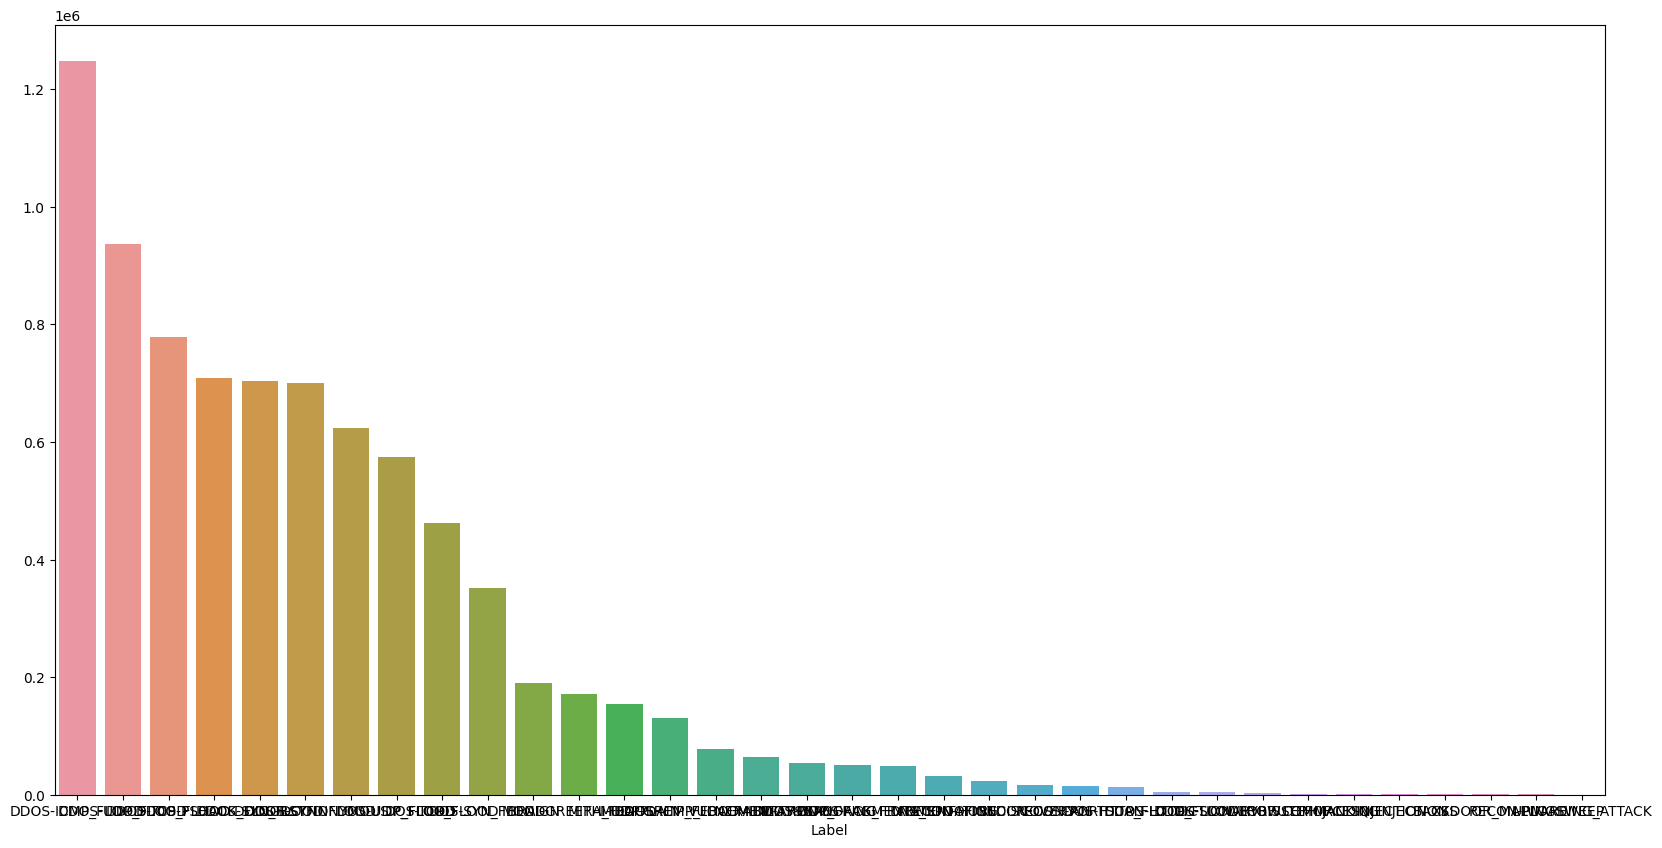

In [11]:
plt.figure(figsize=(20,10))

sns.barplot(y=labels_count,x=names_labels)

<h2>The data is highly imbalance</h2>

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer

<h1>Pipline for Data Preprocessing </h1>

<h2>Numerical Pipeline</h3>

In [13]:
numerical_piplines= Pipeline(
    [
        ('imputer',SimpleImputer(strategy='mean')),
        ('RS',RobustScaler())
    ]
)

<h2>Checking outliers</h2>

In [ ]:

sns.boxplot(df)

Not an efficient way of checking outliers but we get idea to much outliers exists. So we don't use standard scaler as it is highly affected by outliers so we use Robustscaler.

<h2>Categorical Pipeline</h2>

<h2>Encoder for categorical data</h2>
<p>According to the paper OneHotEncoder is good for binary classification and label binarizer is good for multi class classification. But Gemini says the Label Binarizer is good for target feature and OneHotEncoder is best for other features like multiple columns.</p>

In [14]:
from sklearn.preprocessing import LabelBinarizer

In [15]:
categorical_pipeline_BinaryClassification=Pipeline(
    [
        ('OHD',OneHotEncoder(handle_unknown='ignore')),
        
    ]
)

categorical_pipeline_Multi_Classification=Pipeline(
    [
        ('OHD',LabelBinarizer()),
            ]
)

<h2>ColumnTranformers</h2>

In [16]:
from sklearn.compose import ColumnTransformer

<h2>Why use ColumnTransformer?</h2>
<p>Columntransformer is used to make sure the whole dataframe/dataset is processed. Means a dataset contains different types of columns and single pipline cannot process it so we use column as wrapper around the pipline where it make sure all the columns are processed and get to the model </p>

In [17]:
preprocessor_Binary_classification = ColumnTransformer (
    [
        ('num',numerical_piplines),
        ('cate',categorical_pipeline_BinaryClassification)
    ]
)

In [18]:
preprocessor_Multi_class_classification = ColumnTransformer (
    [
        ('num',numerical_piplines),
        ('cate',categorical_pipeline_Multi_Classification)
    ]
)

<h2>Finding best parameters</h2>

In [44]:
X=(df.select_dtypes(include='number'))
y=df['Label']

In [45]:
X.columns

Index(['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Variance'],
      dtype='object')

In [34]:
X

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number
0,32.0,6,99.4,10041.426861,0.0,0.0,0.0,0.5,1.0,0.0,...,1.0,1.0,16016.0,66.0,4254.0,1601.6,1536.304889,1601.6,0.000103,10.0
1,32.0,6,120.0,641.311275,0.0,0.0,0.0,0.2,1.0,0.0,...,1.0,1.0,9794.0,66.0,2962.0,979.4,974.595437,979.4,0.002116,10.0
2,29.6,6,77.2,62.990968,0.0,0.0,0.0,0.3,0.9,0.0,...,1.0,1.0,5965.0,66.0,2962.0,596.5,947.314948,596.5,0.022838,10.0
3,25.2,6,80.9,410.273104,0.0,0.0,0.0,0.1,0.8,0.0,...,0.9,0.9,12395.0,60.0,2962.0,1239.5,920.812835,1239.5,0.003697,10.0
4,32.0,6,130.8,2895.019326,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,9348.0,66.0,1514.0,934.8,747.743985,934.8,0.000378,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8147347,22.4,6,118.4,101.910848,0.0,0.0,0.0,0.3,0.7,0.0,...,0.8,0.8,839.0,60.0,131.0,83.9,27.742667,83.9,0.010338,10.0
8147348,12.8,17,118.0,32.645604,0.0,0.0,0.0,0.1,0.2,0.0,...,1.0,1.0,1466.0,60.0,230.0,146.6,66.726973,146.6,0.030929,10.0
8147349,9.6,17,72.3,42.722251,0.0,0.0,0.0,0.0,0.1,0.0,...,1.0,1.0,1206.0,60.0,218.0,120.6,63.784707,120.6,0.032084,10.0
8147350,26.0,6,109.5,170.430189,0.0,0.0,0.0,0.2,0.8,0.0,...,1.0,1.0,1219.0,66.0,263.0,121.9,79.990902,121.9,0.009279,10.0


<h2>Infinite Values in Rate</h2>

In [46]:
# X=X.astype(int)
import numpy as np
numeric_cols = X.select_dtypes(include=[np.number]).columns
print("\nInfinite values per column:")
print(np.isinf(X[numeric_cols]).sum())



Infinite values per column:
Header_Length        0
Protocol Type        0
Time_To_Live         0
Rate               191
fin_flag_number      0
syn_flag_number      0
rst_flag_number      0
psh_flag_number      0
ack_flag_number      0
ece_flag_number      0
cwr_flag_number      0
ack_count            0
syn_count            0
fin_count            0
rst_count            0
HTTP                 0
HTTPS                0
DNS                  0
Telnet               0
SMTP                 0
SSH                  0
IRC                  0
TCP                  0
UDP                  0
DHCP                 0
ARP                  0
ICMP                 0
IGMP                 0
IPv                  0
LLC                  0
Tot sum              0
Min                  0
Max                  0
AVG                  0
Std                  0
Tot size             0
IAT                  0
Number               0
Variance             0
dtype: int64


In [47]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean = X.dropna()


In [48]:
print(np.isinf(X[numeric_cols]).sum())


Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Variance           0
dtype: int64


In [49]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
sample_size=0.10
X_tuning, _, y_tuning, _ = train_test_split(
    X, y, train_size=sample_size, stratify=y, random_state=42
)

print(f"Tuning on {X_tuning.shape[0]} samples (Original: {X.shape[0]})")

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'], 
    
    'max_depth': [10, 20, 30, None],
    
    'min_samples_split': [100, 500, 1000], 
    
    'min_samples_leaf': [50, 100, 200],
    
    'max_features': [None, 'sqrt'],
    
    'class_weight': ['balanced', None] 
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3, 
    n_jobs=-1, 
    verbose=2,
    scoring='f1_macro' 
)

print("Starting Grid Search...")
grid_search.fit(X_tuning, y_tuning)

print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-Validation Score (F1 Macro): {grid_search.best_score_}")


Tuning on 814735 samples (Original: 8147352)
Starting Grid Search...
Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=100; total time=  10.9s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=500; total time=  10.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=100; total time=  10.5s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=500; total time=  10.7s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=100; total time=  10.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=500; total time=  10.6s


In [50]:
print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-Validation Score (F1 Macro): {grid_search.best_score_}")


Best Parameters found: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 50, 'min_samples_split': 100}
Best Cross-Validation Score (F1 Macro): 0.5366445821471159


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 

models_binary_class = [
    Pipeline([
        ('preprocessor', preprocessor_Binary_classification),
        ('classifier', DecisionTreeClassifier())
    ]),
    Pipeline([
        ('preprocessor', preprocessor_Binary_classification),
        ('classifier', RandomForestClassifier())
    ])
]

models_Multi_class = [
    Pipeline([
        ('preprocessor', preprocessor_Multi_class_classification),
        ('classifier', DecisionTreeClassifier())
    ]),
    Pipeline([
        ('preprocessor', preprocessor_Multi_class_classification),
        ('classifier', RandomForestClassifier())
    ])
]

<h1>ImBalanced Dataset</h1>

<h1>Balanced Dataset</h1>

In [21]:
# Upgrade scikit-learn and install the correct imbalanced-learn package
# %pip install --upgrade scikit-learn imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

# Auto-balance: reduces majority classes to match the minority size
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

NameError: name 'X' is not defined